In [1]:
%matplotlib widget

import numpy as np
import pandas as pd
import os 
import sys
import seaborn as sns

from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import matplotlib.pyplot as plt
#reloading modules
import importlib as il

from scipy.signal import savgol_filter
from scipy.signal import medfilt2d
from scipy.ndimage import median_filter

#Home made modules
import lasso_selector as ls
import MotorPAINT_postDoM as mp

from  matplotlib.lines import Line2D

In [2]:
il.reload(mp)

<module 'MotorPAINT_postDoM' from 'C:\\Users\\Hanna\\scripts\\MotorPAINT_postDoM.py'>

In [3]:
#initiate an instance of a class for a neuron
#Note that the popup window can behind the browser window
neuron=mp.Motor_paint()

neuron.max_angle=60

Results_Drift Correction (frames=3000 px size=14 nm)
C:/Users/Hanna/Documents/Master_thesis_data/2022_03_31_Motor_PAINT_Neurons_DIV3_Analysis/S02_C02/Results_Drift Correction (frames=3000 px size=14 nm).csv
The current parameter values are listed. You can redefine each parameter
mintracklength : 6 frames 
maxtracklength : 2000 frames
min_displacement : 200 nm 
minspeed : 100 nm/s 
maxspeed : 1500 nm/s 
exptime : 0.06 sec 
max_angle : 50 degrees 
stepsize displacement vectors:3 Note these are only applied when you call the function to filter for angle speretly
Confinement ratio min-max:(0.1, 0.9)


In [4]:
neuron.max_angle

60

In [4]:


#Filter data
neuron.filter_data()


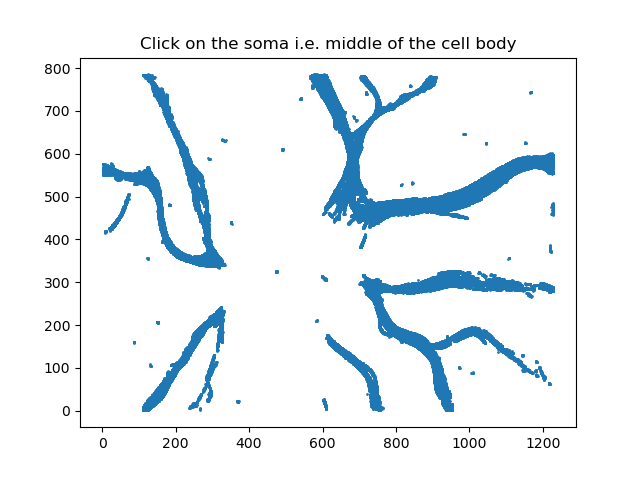

In [5]:
#Choose the location of the soma
x=neuron.dfs['X_(px)']
y=neuron.dfs['Y_(px)']

subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=True)
fig, ax = plt.subplots(subplot_kw=subplot_kw)

pts = ax.scatter(x,y, s=1)

soma_coords = []

def onclick(event):
    global soma_coords
    
    if event.inaxes:
        soma_coords.append((event.xdata, event.ydata))
        ax.plot(soma_coords[0][0],soma_coords[0][1], 'ro')
        ax.set_title(f"Coordinates are {round(soma_coords[0][0],2)},{round(soma_coords[0][1],2)}")
        fig.canvas.mpl_disconnect(cid)


cid1 = fig.canvas.mpl_connect('button_press_event', onclick)
ax.set_title("Click on the soma i.e. middle of the cell body")
   
plt.show()



In [6]:
neuron.filter_for_angle(minduration = 4, actually_filter=True)
neuron.divide_two_directions(soma_coords=soma_coords)
neuron.split_tracks()

Filtering for angle....
Warning turned of : pd.options.mode.chained_assignment = None
Filtered for angle, all stretches of tracks below 60 were removed and strecthec shorted than 4 frames as well, the index is reset such that each stretch becomes a track on its own
The number of stretches after filtering for angle and splitting tracks: 26950
number of localisations toward soma 129211
number of localisations away from soma 228420
Ratio in over total 0.36
Results_filtered.csv
Results_RT.csv
Results_RB.csv
Results_LT.csv
Results_LB.csv
Results_PLUSIN.csv
Results_PLUSOUT.csv


C:\Users\Hanna\anaconda3\lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


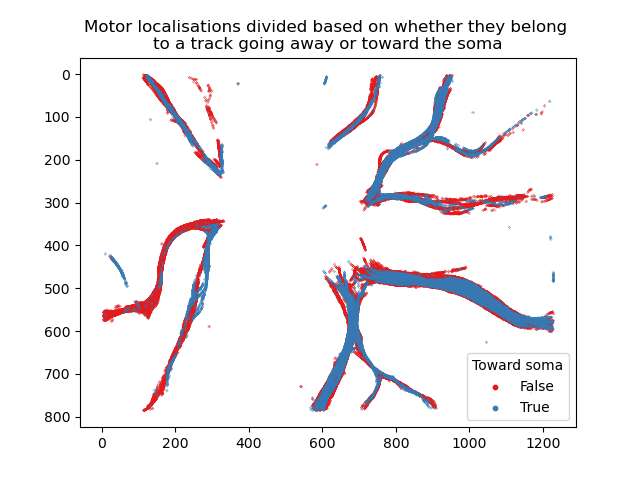

In [7]:
%matplotlib widget
sns.set_palette('Set1')
groups = neuron.dfs.groupby('Plus_IN')
for name, group in groups:
    plt.scatter(group['X_(px)'], group['Y_(px)'], marker='o', s=0.01, label=name)
plt.title("Motor localisations divided based on whether they belong \nto a track going away or toward the soma")
lgnd=plt.legend(title="Toward soma")
for handle in lgnd.legendHandles:
    handle.set_sizes([10.0])
#Note the y-axis is inverted so that the image is the same as when plotted in Fiji
plt.gca().invert_yaxis()
plt.show()

In [62]:
sns.set_palette("Blues")
current_palette=sns.color_palette()
colors_blue=current_palette.as_hex()
colors_blue=colors_blue*100

sns.set_palette("plasma")
current_palette=sns.color_palette()
colors_p=current_palette.as_hex()
colors_p=colors_p*100


In [39]:
neuron.dfs.columns

Index(['Old_Track_ID', ' ', 'X_(px)', 'Y_(px)', 'Frame_Number', 'X_(nm)',
       'X_loc_error(nm)', 'Y_(nm)', 'Y_loc_error(nm)', 'Z_(nm)',
       'Z_loc_error(nm)', 'Amplitude_fit', 'Amp_error', 'BGfit', 'BGfit_error',
       'SD_X_(nm)', 'SD_X_error(nm)', 'SD_Y_(nm)', 'SD_Y_error(nm)',
       'False_positive', 'IntegratedInt', 'SNR', 'R2_fit', 'Iterations_fit',
       'Particle_ID', 'Track_Length', 'dX_track_(nm)', 'dY_track_(nm)',
       'Displacement_(nm)', 'dx', 'dy', 'Step_Distance_(nm)', 'Speed_(nm/s)',
       'Net/total', 'Angle_degree', 'under_max_angle', 'dX_stretch_(nm)',
       'dY_stretch_(nm)', 'Displacement_stretch_(nm)', 'dx_s', 'dy_s',
       'Step_Distance_stretch(nm)', 'Speed_stretch(nm/s)', 'Net/total_stretch',
       'Plus_IN'],
      dtype='object')

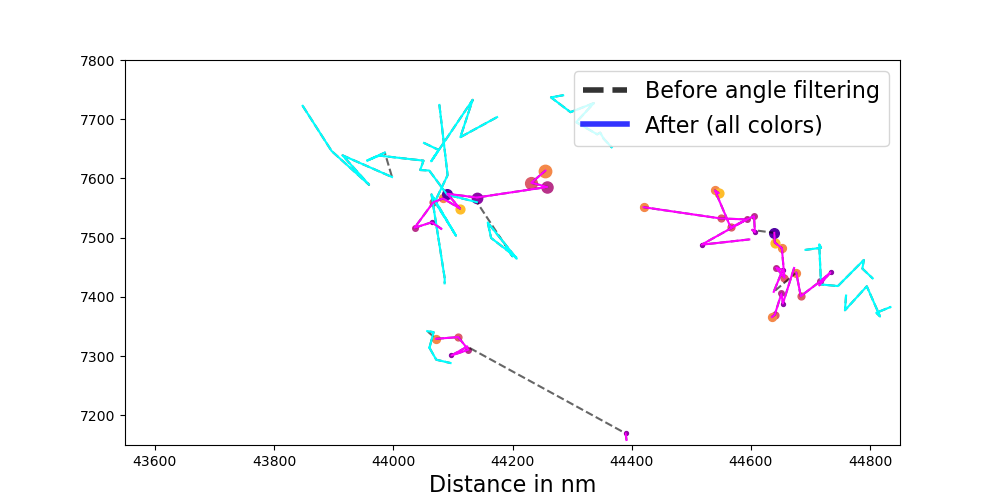

In [65]:
%matplotlib widget
ratioxy=20/10
x_axis=10
y_axis=x_axis/ratioxy
    
ylow,yup=(7150,7800)
xlow,xup=(43550,44850)
df_plot1= neuron.dfs[neuron.dfs['Net/total']<0.2]
df_plot1=df_plot1[(df_plot1['X_(nm)'] > xlow)&(df_plot1['X_(nm)'] < xup)&\
                    (df_plot1['Y_(nm)'] < yup)&(df_plot1['Y_(nm)'] > ylow)]

fig, ax = plt.subplots(figsize=[x_axis, y_axis])
for i in df_plot1['Old_Track_ID'].unique(): 
        x=df_plot1[df_plot1['Old_Track_ID']==i]['X_(nm)']
        y=df_plot1[df_plot1['Old_Track_ID']==i]['Y_(nm)']
        ax.plot(x,y,'--', color="black", alpha=0.6)

for n,i in enumerate(df_plot1.index.unique()): 
    x=df_plot1[df_plot1.index==i]['X_(nm)']
    y=df_plot1[df_plot1.index==i]['Y_(nm)']
    
    if df_plot1[df_plot1.index==i]['Plus_IN'].iloc[0]:
        ax.plot(x,y, color = 'magenta', alpha=1)#color ='blue', color=colors[n]
    else:
        ax.plot(x,y, color = 'cyan', alpha=1)
        
for n,i in enumerate(df_plot1.index.unique()): 
    
    for x,y,f in zip(df_plot1[df_plot1.index==i]['X_(nm)'], df_plot1[df_plot1.index==i]['Y_(nm)'], df_plot1[df_plot1.index==i]['Frame_Number']):
           
        f_n = f- df_plot1[df_plot1.index==i]['Frame_Number'].min()   
        if df_plot1[df_plot1.index==i]['Plus_IN'].iloc[0]:
            ax.scatter(x,y, color = colors_p[f_n], alpha=1, s=f_n*8 )#color ='blue', color=colors[n]
            #ax.annotate(f_n, (x, y))
       # else:
            #ax.scatter(x,y, color = 'cyan', alpha=1)
plt.legend()
    
ax.set_ylim([ylow,yup])
ax.set_xlim([xlow,xup])
ax.set_xlabel('Distance in nm' , fontsize=16)

labels=['Before angle filtering', 'After (all colors)']  

      
custom_lines = [Line2D([0], [0],ls='--',  color="black", lw=4, alpha=0.8),\
                Line2D([0], [0], color='blue', lw=4, alpha=0.8)]

    
ax.legend(custom_lines, [labels[0], labels[1]], fontsize=16, loc='upper right')
plt.show()

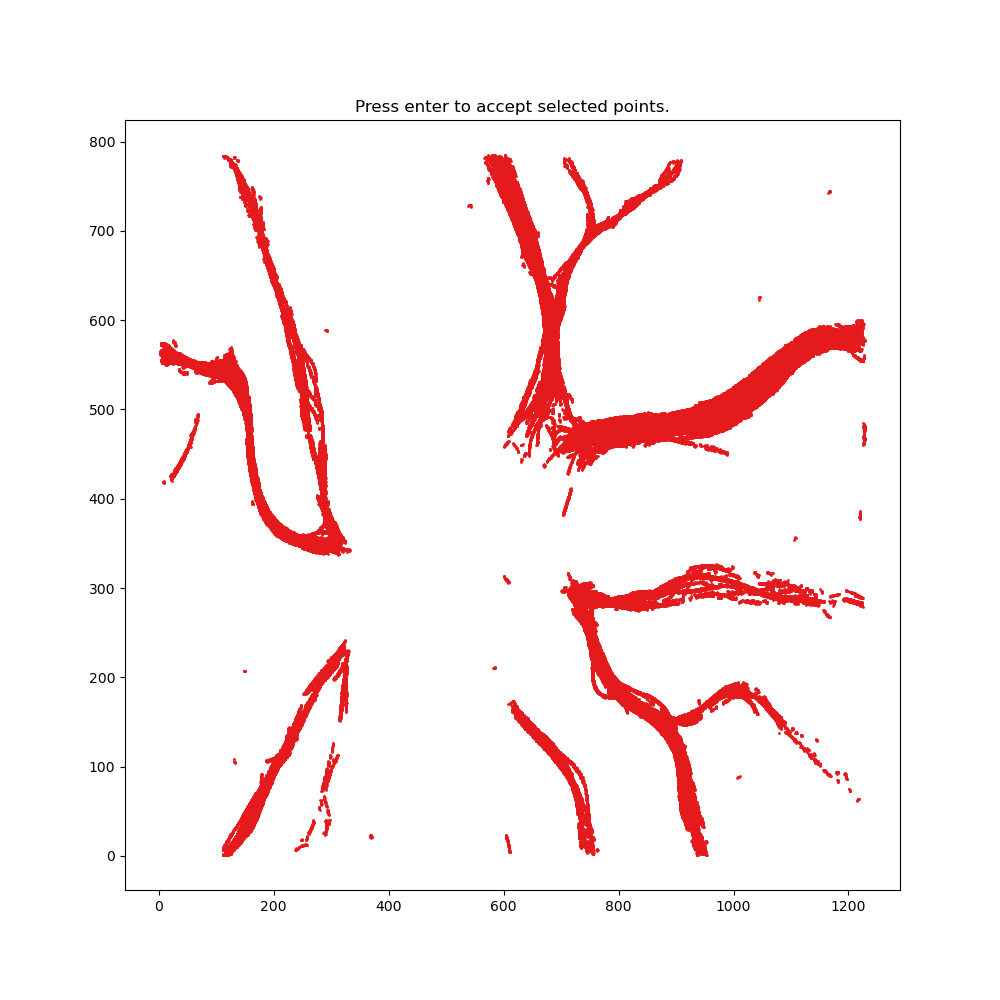

In [8]:
%matplotlib widget
DFS=neuron.dfs.copy()
x=neuron.dfs['X_(px)']
y=neuron.dfs['Y_(px)']

keys = ['X_(px)','Y_(px)']
    
subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=True)
fig, ax = plt.subplots(subplot_kw=subplot_kw, figsize=(10,10))

pts = ax.scatter(x,y, s=1)
ls.selector = ls.SelectFromCollection(ax, pts)

n=0
neurites={}
neuron_mdf=pd.DataFrame()
def accept(event):
    if event.key == "enter":
            
           
        global n     
        global data_points
        global neurite_df
        global neuron_mdf
        n= n+1    
        data_points=ls.selector.xys[ls.selector.ind].data
        
        neurites[n]=data_points
        df1=pd.DataFrame(data_points, columns=keys)
        i1 = DFS.set_index(keys).index
        i2 = df1.set_index(keys).index
        neurite_df=DFS[i1.isin(i2)]
        neurite_df['Neurite_label']=n
        neuron_mdf=pd.concat([neuron_mdf,neurite_df])    
    elif event.key == "shift":          
        ls.selector.disconnect()
        ax.set_title("DONE")
        fig.canvas.draw()
        fig.canvas.mpl_disconnect(cid)



cid= fig.canvas.mpl_connect("key_press_event", accept)
ax.set_title("Press enter to accept selected points.")

plt.show()

In [9]:
#safe the data frame with neurite labels as csv
name=os.getcwd().rsplit('\\', 1)[1]
neuron_mdf.to_csv('Data_frame_neurites_labelled_'+name+'.csv')

In [10]:
Results_PLUSIN = neuron_mdf[ (neuron_mdf['Plus_IN'] ==True) ]
number_of_localisations_IN=len(Results_PLUSIN.index.unique())
print('number of localisations toward soma', round(number_of_localisations_IN,2))
    
Results_PLUSOUT = neuron_mdf[ (neuron_mdf['Plus_IN'] ==False) ]
number_of_localisations_OUT=len(Results_PLUSOUT.index.unique())
print('number of localisations away from soma', round(number_of_localisations_OUT,2))
             
plusin_overtotal = round(number_of_localisations_IN/(number_of_localisations_OUT+number_of_localisations_IN), 2)

print(f'Ratio in over total {plusin_overtotal}')


number of localisations toward soma 9431
number of localisations away from soma 16415
Ratio in over total 0.36


In [11]:
#Color palette for plotting
sns.set_palette('tab20')
current_palette=sns.color_palette()
colors=current_palette.as_hex()


Percentage plus end in over total 36.11 %


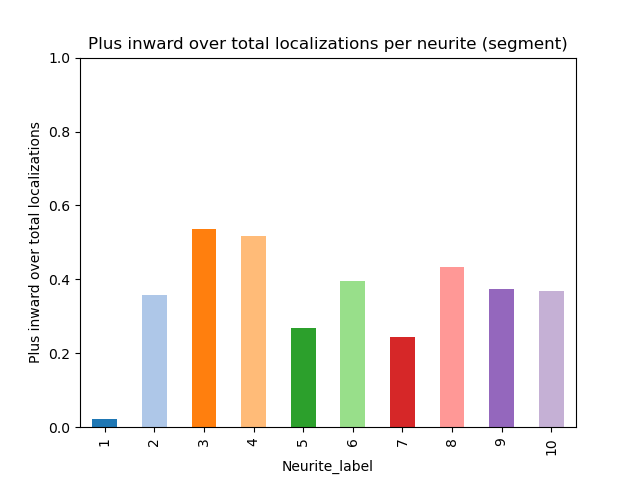

In [12]:
plusin_over_total=neuron_mdf.groupby(neuron_mdf.Neurite_label)['Plus_IN'].sum()/neuron_mdf.groupby(neuron_mdf.Neurite_label)['Plus_IN'].count()
%matplotlib widget
print('Percentage plus end in over total', round((neuron_mdf['Plus_IN'].sum()/neuron_mdf['Plus_IN'].count())*100,2), '%')
plusin_over_total.plot.bar(color=colors)
plt.ylabel('Plus inward over total localizations')
plt.title('Plus inward over total localizations per neurite (segment)')
plt.ylim([0,1])
plt.show()


C:\Users\Hanna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hanna\anaconda3\lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


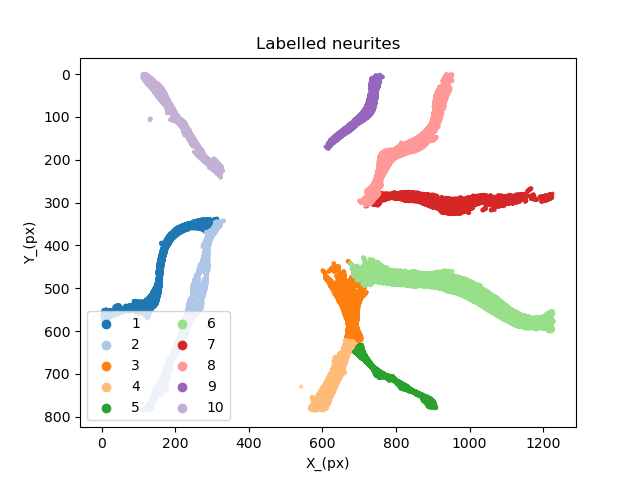

In [13]:
%matplotlib widget
sns.scatterplot(neuron_mdf['X_(px)'], neuron_mdf['Y_(px)'], hue=neuron_mdf['Neurite_label'],marker='.',linewidth=0, alpha = 0.7, palette=colors[0:neuron_mdf['Neurite_label'].max()])
plt.gca().invert_yaxis()
plt.title('Labelled neurites')
plt.legend( ncol=2)
plt.show()

0.3516001525563144


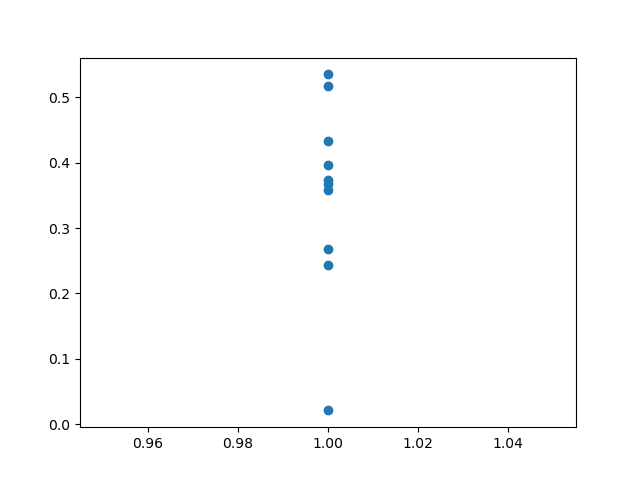

In [14]:
%matplotlib widget
ar=plusin_over_total.to_numpy()
print(ar.mean())
plt.plot(len(ar)*[1],ar, 'o');

In [15]:
groupedbyneurite=pd.DataFrame()

groupedbyneurite['Plus_in_over_total']=neuron_mdf.groupby(neuron_mdf.Neurite_label)['Plus_IN'].sum()/neuron_mdf.groupby(neuron_mdf.Neurite_label)['Plus_IN'].count()
groupedbyneurite['label']=groupedbyneurite.index
groupedbyneurite['Effective_neurite_label']=['A', 'B', 'C', 'C', 'C', 'D', 'E', 'F', 'G', 'H']


Percentage plus end in over total 36.11 %
Excluding the neurite, A,  with least plus in localisations:
Percentage plus end in over total 40.73 %


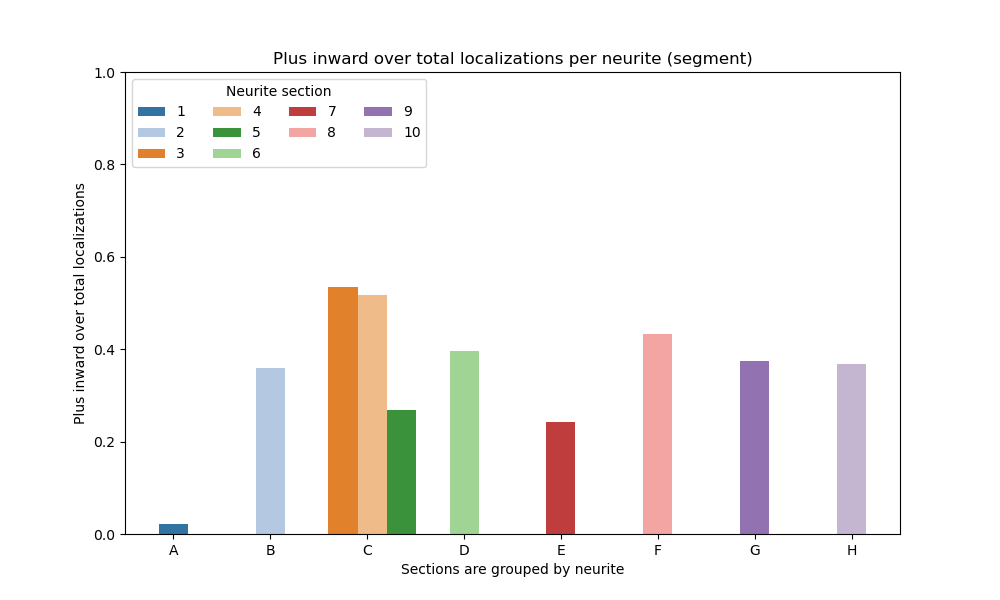

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))


print('Percentage plus end in over total', round((neuron_mdf['Plus_IN'].sum()/neuron_mdf['Plus_IN'].count())*100,2), '%')
print('Excluding the neurite, A,  with least plus in localisations:')
print('Percentage plus end in over total', round((neuron_mdf[neuron_mdf.Neurite_label != 1]['Plus_IN'].sum()/neuron_mdf[neuron_mdf.Neurite_label != 1]['Plus_IN'].count())*100,2), '%')

ax=sns.barplot(x='Effective_neurite_label', y='Plus_in_over_total', hue='label', data=groupedbyneurite, dodge=False)
plt.legend(title='Neurite section',loc='upper left', ncol=4)
plt.ylabel('Plus inward over total localizations')
plt.xlabel('Sections are grouped by neurite')
plt.title('Plus inward over total localizations per neurite (segment)')
plt.ylim([0,1])
def change_width(ax, new_value) :
    
    list_xs=[]
    for i,patch in enumerate(ax.patches) :
        
        
        
        locs = ax.get_xticks()
        if str(patch.get_height()) != 'nan': 
            
            list_xs.append(patch.get_x())
            
    ls=[]
    for i,patch in enumerate(ax.patches) :
        
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)
        
        if str(patch.get_height()) != 'nan': 
            count_x= list_xs.count(patch.get_x())
            ls.append(patch.get_x())
            ls_count= ls.count(patch.get_x())
            count_x= list_xs.count(patch.get_x())
            if count_x==1:  
                patch.set_x(patch.get_x()+diff*0.5    )
            elif count_x==2: 
                if ls_count==1:  
                    patch.set_x(patch.get_x()  +diff  )

                elif ls_count==2:
                    patch.set_x(patch.get_x() +diff+new_value )
            elif count_x==3: 
                if ls_count==1:  
                    patch.set_x(patch.get_x()    )
                elif ls_count==2: 
                    patch.set_x(patch.get_x() +new_value )
                elif ls_count==3: 
                    patch.set_x(patch.get_x() +new_value*2)

        # we recenter the bar
        #patch.set_x(patch.get_x() + diff * .5)
        
        

change_width(ax, 0.30)
plt.show()